In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
mpl.rc('font',family='Malgun Gothic')

# 크롤링 Crawling & Scraping
- Scraping : 웹이나 다운로드 된 HTML 자료에서 정보를 추출하는 기법
- Crawling : 웹 페이지의 하이퍼링크를 돌아다니며 웹 페이지를 다운로드 기법
- Python 크롤링 라이브러리
    - Beautiful Soup : HTML & XML 문서를 분석
    - Selenium : App이나 Web Testing

In [2]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# 웹 크롤링 라이브러리 호출
from selenium import webdriver

In [4]:
# 드라이버를 이용해서 웹페이지 열지
driver = webdriver.Chrome('chromedriver.exe')
# 특정사이트에 접속
driver.get('https://www.jobplanet.co.kr/job')

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_10764\1838079697.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [5]:
# 전체 카테고리 버튼을 가져와 클릭
from selenium.webdriver.common.by import By
driver.find_element(By.XPATH,
                    '/html/body/div[1]/div[1]/header/div[2]/div/a[1]/span').click()

In [6]:
# 이메일 입력 
driver.find_element(By.XPATH,
        '//*[@id="user_email"]').send_keys('52100108@dankook.ac.kr')


In [7]:
# 비밀번호 입력 
driver.find_element(By.XPATH,
        '//*[@id="user_password"]').send_keys('kgkg3920691')


In [8]:
# 로그인 버튼 클릭 
driver.find_element(By.XPATH,
                    '//*[@id="signInSignInCon"]/div[2]/div/section[3]/fieldset/button').click()

In [9]:
# 포스코 기업 페이지 접속
driver.get('https://www.jobplanet.co.kr/companies/50130/reviews/%ED%8F%AC%EC%8A%A4%EC%BD%94')

# 열려있는 창 제거
driver.find_element(By.XPATH,
                    '//*[@id="premiumReviewChart"]/div/div[3]/div[2]/div/div[1]/button').click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="premiumReviewChart"]/div/div[3]/div[2]/div/div[1]/button"}
  (Session info: chrome=108.0.5359.125)
Stacktrace:
Backtrace:
	(No symbol) [0x00A3F243]
	(No symbol) [0x009C7FD1]
	(No symbol) [0x008BD04D]
	(No symbol) [0x008EC0B0]
	(No symbol) [0x008EC22B]
	(No symbol) [0x0091E612]
	(No symbol) [0x009085D4]
	(No symbol) [0x0091C9EB]
	(No symbol) [0x00908386]
	(No symbol) [0x008E163C]
	(No symbol) [0x008E269D]
	GetHandleVerifier [0x00CD9A22+2655074]
	GetHandleVerifier [0x00CCCA24+2601828]
	GetHandleVerifier [0x00AE8C0A+619850]
	GetHandleVerifier [0x00AE7830+614768]
	(No symbol) [0x009D05FC]
	(No symbol) [0x009D5968]
	(No symbol) [0x009D5A55]
	(No symbol) [0x009E051B]
	BaseThreadInitThunk [0x76246359+25]
	RtlGetAppContainerNamedObjectPath [0x77A37B74+228]
	RtlGetAppContainerNamedObjectPath [0x77A37B44+180]


In [ ]:
div_list = []
comm_list = []
for i in range(1,6):
    div_name  = driver.find_element(By.XPATH,
      '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[1]/span[2]').text    
    comm = driver.find_element(By.XPATH,
      '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[2]/div/div[1]/h2').text
    div_list.append(div_name)
    comm_list.append(comm)

In [ ]:
pd.DataFrame({'부서명':div_list, '한줄평':comm_list})

In [ ]:
# 페이지 정보가 불러올 때까지 기다림
driver.implicitly_wait(10)

In [ ]:
def scrap1( ): 
    div_list = []
    comm_list = []
    for i in range(1,6): 
        try :
            div_name  = driver.find_element(By.XPATH,
                  '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[1]/span[2]').text    
            comm = driver.find_element(By.XPATH,
                  '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[2]/div/div[1]/h2').text
            div_list.append(div_name)
            comm_list.append(comm)
        except Exception as e :
            print(e)
        finally : 
            pass

In [ ]:
scrap1()

In [ ]:
# 창을 띄우지 않고 크롤링을 수행 
options = webdriver.ChromeOptions()
options.add_argument('headless') 

driver = webdriver.Chrome(options = options)
driver.get('https://www.jobplanet.co.kr') # 웹사이트 실행 
driver.quit() # 크롤링 종료 

In [ ]:
def start_Code( url ):
    import time 
    driver = webdriver.Chrome('chromedriver')
    # driver = webdriver.Chrome(ChromeDriverManager().install())  # Mac 
    driver.get('https://www.jobplanet.co.kr')
    driver.implicitly_wait(10)  
    time.sleep(2)
    driver.find_element(By.XPATH, 
                '/html/body/div[1]/div[1]/header/div[2]/div[2]/a[1]/span').click()
    driver.find_element(By.XPATH,
                   '//*[@id="user_email"]').send_keys('52100108@dankook.ac.kr')
    driver.find_element(By.XPATH,
                   '//*[@id="user_password"]').send_keys('kgkg3920691')
    driver.find_element(By.XPATH,
        '//*[@id="signInSignInCon"]/div[2]/div/section[3]/fieldset/button').click()
    import time
    time.sleep(5) 
    driver.get(url)
    driver.find_element(By.XPATH,
        '//*[@id="premiumReviewChart"]/div/div[3]/div[2]/div/div[1]/button').click()
    
    pasing_Scrap(driver)

In [ ]:
def pasing_Scrap(driver):
    import time
    for p in range(0,30): 
        try:
            driver.implicitly_wait(3)

            comm_Scrap(driver)
        except:
            print('pasing Error')
        finally:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="viewReviewsList"]/div/div/div/div[5]/article/a[7]').click()
            print('Done')

In [ ]:
def pasing_Scrap(driver):
    import time
    for p in range(0,30): 
        try:
            driver.implicitly_wait(3)

            comm_Scrap(driver)
        except:
            print('pasing Error')
        finally:
            time.sleep(3)
            driver.find_element(By.XPATH, '//*[@id="viewReviewsList"]/div/div/div/div[5]/article/a[7]').click()
            print('Done')

In [ ]:
def comm_Scrap(driver):
    for i in range(1,6):
        try:
            import time
            driver.implicitly_wait(3)
            div_txt = driver.find_element(By.XPATH, '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[1]/span[2]').text
            state_txt = driver.find_element(By.XPATH, '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[1]/span[4]').text
            regin_txt = driver.find_element(By.XPATH, '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[1]/span[6]').text
            date_txt = driver.find_element(By.XPATH, '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[1]/span[8]').text
            comm_txt = driver.find_element(By.XPATH, '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[2]/div/div[1]/h2').text
            good_txt = driver.find_element(By.XPATH, '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[2]/div/dl/dd[1]/span').text
            bad_txt = driver.find_element(By.XPATH, '//*[@id="viewReviewsList"]/div/div/div/section['+str(i)+']/div/div[2]/div/dl/dd[2]/span').text
           
            div_list.append(div_txt)
            state_list.append(state_txt)
            regin_list.append(regin_txt)
            date_list.append(date_txt)
            comm_list.append(comm_txt)
            good_comm_list.append(good_txt)
            bad_comm_list.append(bad_txt)
        except :
            print('comm Error')
        finally : 
            pass

In [ ]:
div_list = [] # 직군 
state_list = [] # 전현직 상태
regin_list = [] # 지역
date_list  = [] # 작성일자 
comm_list  = [] # 한줄평 
good_comm_list = [] # 장점
bad_comm_list  = [] # 단점 

In [ ]:
start_Code('https://www.jobplanet.co.kr/companies/50130/reviews/%ED%8F%AC%EC%8A%A4%EC%BD%94')

In [ ]:
pd.DataFrame({'작성일자':date_list , '직군':div_list , '지역': regin_list, '한줄평':comm_list,
             '기업장점':good_comm_list , '기업단점':bad_comm_list})

# 제조 공정 데이터 분석

In [ ]:
df1 = pd.read_csv('07_Data.csv')
df1.info()

In [ ]:
df1['제품두께'].unique()

In [ ]:
df1['제품두께(float)'] = df1['제품두께'].replace({'415-515':4.15, '417-518':4.17}).astype(float)

In [ ]:
df1['제품두께'].unique()

In [ ]:
# 연속형 X - 연속형 Y
# 정지시간2 (오류가 조치될 때까지 걸린시간) - '제품두께(float)' 데이터 간 상관성 확인

plt.ylim([0, 0.5])
plt.xlim([0, 100])
sns.scatterplot(data=df1, x='정지시간2', y='제품두께(float)')

In [ ]:
# 연속형 데이터의 정규성 확인
stats.normaltest(df1['정지시간2'])

In [ ]:
stats.normaltest(df1['제품두께(float)'])

In [ ]:
# 결측값 제거 (dropna)
df2 = df1.dropna()

In [ ]:
print(stats.normaltest(df2['정지시간2']))
print(stats.normaltest(df2['제품두께(float)']))

In [ ]:
# 제품두께에 따른 오류 조치까지 걸린시간이 서로 상관성이 있는가
# 귀무가설 : 제품두께에 따른 오류 조치까지 걸린시간이 서로 상관성이 없다.
# 대립가설 : 제품두께에 따른 오류 조치까지 걸린시간이 서로 상관성이 있다.
stats.spearmanr(df2['정지시간2'], df2['제품두께(float)'])
# P.value > 0.05 / 귀무가설 참 / 두 연속형 자료는 서로 상관성이 없다.

# Mission 6

- 07_Data.csv 파일을 가져와 df1으로 선언해 아래와 같은 분석을 하고자 한다, 
1) df1 데이터서 '메세지'의 빈도수를 확인 
2) 오류 '메세지'가 가장 많은 항목을 추출하여 df_error 로 선언 
3) df_error 데이터의 '작업구분' (주/야간)에 따른 '정지시간2' (오류 조치시간)의 평균을 계산하여, result_error.csv 로 저장 
4) df_error 데이터의 '작업구분' (주/야간)에 따른 '정지시간2' (오류 조치시간)의 평균의 차이가 있는지 가설검정을 수행 
5) df_error 데이터의 '제품두께(float)'에 따른 '정지시간2'의 상관관계를 산점도로 시각화 하시오 
6) df_error 데이터의 '제품두께(float)'에 따른 '정지시간2'의 상관관계가 있는지 가설검정을 수행

- 08_Data.csv 데이터를 가져와 df3로 선언하여 아래와 같은 미션을 수행 
7) df3 데이터의 구조와 타입을 확인하고, 연속형 데이터의 평균/중앙값/표준편차를 확인
8) df3 데이터에서 Etching1 에 해당하는 값을 34를 기준으로 분할 
    - Etching1이 34 이상이면 A 
    - Etching1이 34 미만이면 B 로 '분류'라는 새로운 변수로 선언
9) df3에서 CVD1과 CVD2 데이터의 상관성이 있는지 분석하고자 한다.
    - CVD1값과 CVD2값의 산점도를 scatterplot으로 시각화 하시오
    - '분류'에 따른 CVD1과 CVD2값을 산점도로 시각화 하시오 
10) df3에서 Target값이 높은 상위 100개 데이터를 추출하여,
    - '분류'에 (A,B) 따른 CVD3의 평균의 유의미한 차이가 있는지 가설검정 
    -  결측값은 제거 후 검정 진행 / P.value 와 결론까지 작성 
    - '분류'에 (A,B) 따른 CVD3값의 평균을 bar chart로 시각화 
11) df3의 '분류'에 따른 'Photo1'값과 'Photo2'값의 합/최대/최소값을 계산 
12) df3의 'DATE'항목을 날짜데이터로 변환하여, 'DATE_dt'로 선언한 뒤, 일자만 추출하여, 
    - '분류'에 따른 '일자'별 'Target'값의 합을 계산


# - 07_Data.csv 파일을 가져와 df1으로 선언해 아래와 같은 분석을 하고자 한다. 

In [112]:
# 데이터를 불러와 df1 이름의 변수로 선언
df1 = pd.read_csv('07_Data.csv') # read_csv : 파일 호출
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   메세지     2792 non-null   object 
 1   발생시간    2792 non-null   object 
 2   조치시간    2792 non-null   object 
 3   정지시간    2792 non-null   object 
 4   정지시간2   2792 non-null   float64
 5   모델      1112 non-null   object 
 6   제품두께    1112 non-null   object 
 7   제품싸이즈   1112 non-null   object 
 8   작업구분    2792 non-null   object 
 9   작업자     1112 non-null   object 
 10  온도      2792 non-null   float64
 11  습도      2792 non-null   float64
dtypes: float64(3), object(9)
memory usage: 261.9+ KB


1) df1 데이터에서 '메세지'의 빈도수를 확인

In [113]:
# 문자 범주형 갯수셀때 value_counts() : 범주형 데이터 빈도수 확인
df1['메세지'].value_counts()

Door Open         1345
자재 픽업 에러           425
비젼 가동 준비 Error     234
롯트 종료              229
초기화 Error          215
e-CIM 관련에러         133
메가진 Full           119
타임 오버               45
SYSTEM HANG UP      35
비젼 데이터               6
ITS 데이터              3
드라이버 알람              2
컨드롤러 알람              1
Name: 메세지, dtype: int64

In [114]:
df1['메세지'].value_counts().sort_values()

컨드롤러 알람              1
드라이버 알람              2
ITS 데이터              3
비젼 데이터               6
SYSTEM HANG UP      35
타임 오버               45
메가진 Full           119
e-CIM 관련에러         133
초기화 Error          215
롯트 종료              229
비젼 가동 준비 Error     234
자재 픽업 에러           425
Door Open         1345
Name: 메세지, dtype: int64

2) '메세지'(오류메세지) 가 가장 많은 항목을 추출하여 df_error 로 선언 


In [115]:
cond1 = (df1['메세지']=='Door Open')
df_error = df1.loc[cond1]
# 특정 조건에 True 해당하는 데이터를 추출

In [116]:
cond1=(df1['메세지']=='Door Open')
df_error=df1.loc[cond1]

3) df_error 데이터의 '작업구분' (주/야간)에 따른 '정지시간2' (오류 조치시간)의 평균을 계산하여, result_error.csv 로 저장

In [117]:
# 데이터를 보고싶을때 추출하고싶을때 값만 보고싶을때 피벗테이블
# pivot_table : 특정 범주형 항목 별로 숫자값의 통계량을 계산
# index -범주형 / values -연속형 / aggfunc -통계량
# to_csv : 해당 데이터 프레임을 csv 파일로 저장

In [118]:
df_error.pivot_table(index='작업구분',values='정지시간2',
                     aggfunc='mean').to_csv("result_error.csv")

4) df_error 데이터의 '작업구분'(주/야간)에 따른 '정지시간2' (오류 조치시간)의 평균의 차이가 있는지 가설검정을 수행

- 통계학에서 보통상황(귀무가설) :
    1. 서로 다른 항목(서로 다른 Columns)들이 독립적이다.
    2. 연속형 데이터의 경우, 정규분포를 따른다.
    (연속형 데이터는 중심극한 정리의 해당 표본의 모집단의 분포를 정규분포로 추정할 수 있다.
    3. 서로 다른 연속형 데이터는 상관성이 없다.

In [119]:
# 범주형 VS 연속형 - 평균비교 
# 4-1) 연속형(정지시간2)의 정규성 검정
# 귀무 가설 (보통상태) : 해당 데이터의 분포는 정규분포를 따른다. 
# 대립 가설 (이상상태) : 해당 데이터의 분포는 정규분포를 따르지 않는다.
stats.normaltest( df_error['정지시간2'] ) 
# stats 라이브러리 내 가설검정 함수 -> Serise 형태로 데이터를 사용 
# P.value (귀무가설이 참일 확률) / < 0.05 (유의수준) / 대립가설 참 # 
# 해당 데이터의 분포는 정규분포를 따르지 않는다


NormaltestResult(statistic=2647.03980170818, pvalue=0.0)

In [120]:
# 4-2) 주/야간에 따른 정지시간2의 평균의 차이가 있는가? (정규성X)
# 귀무가설 : 주/야간에 따른 정지시간2의 평균의 차이가 없다. 
# 대립가설 : 주/야간에 따른 정지시간2의 평균의 차이가 있다. 
cond1 = (df_error['작업구분']=='주간')
cond2 = (df_error['작업구분']=='야간')
df_days  = df_error.loc[cond1] # 작업구분이 '주간' 에 해당 하는 데이터
df_night = df_error.loc[cond2] # 작업구분이 '야간' 에 해당 하는 데이터
stats.ranksums(df_days['정지시간2'], df_night['정지시간2'])
# P.value > 0.05 / 귀무가설 참 / 주/야간에 따른 정지시간2의 평균의 차이가 없다.

RanksumsResult(statistic=1.663870780217619, pvalue=0.09613825542066314)

5) df_error 데이터의 '제품두께(float)'에 따른 '정지시간2'의 상관관계를 산점도로 시각화 하시오 

In [121]:
df_error['제품두께'].unique() #unique : 범주형 데이터 항목 확인

array(['0.25', '2.25', '3.25', '5.25', '7.25', '8.25', '10.25', '12.25',
       '14.25', '16.25', nan, '1.13', '2.13', '6.13', '10.13', '0.15',
       '0.17', '0.32', '415-515', '417-518', '0.21', '0.38', '0.18',
       '0.26', '0.56', '0.13', '0.36', '0.12', '0.1', '0.255', '0.3'],
      dtype=object)

In [141]:
# replace : 특정 값을 다른 값으로 변경
# astype : 데이터 타입을 변경하는 함수
df_error['제품두께(float)'] = df_error['제품두께'].replace({'415-515':4.15,
                                                    '417-518':4.17}).astype(float)
# 변경된 값을 새로운 항목으로 선언 사용

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_10764\2266402390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error1['제품두께(float)'] = df_error['제품두께'].replace({'415-515':4.15,


<AxesSubplot:xlabel='제품두께(float)', ylabel='정지시간2'>

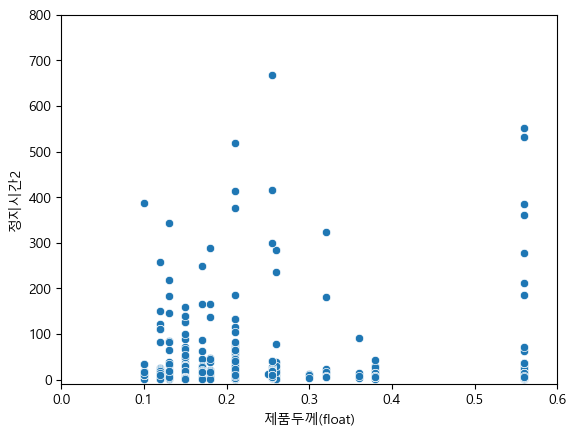

In [137]:
# 산점도 시각화 Scatter Plot
plt.ylim([-10,800]) # .ylim : y축을 조절하는 함수
plt.xlim([0,0.6]) # .xlim : x축을 조절하는 함수
sns.scatterplot(data=df_error, x='제품두께(float)', y='정지시간2')

6) df_error 데이터의 '제품두께(float)'에 따른 '정지시간2'의 상관관계가 있는지 가설검정을 수행

In [140]:
# df_error 데이터에서 결측값을 제거한다음 df_error1 으로 선언하여 분석
df_error1 = df_error.dropna()
print(stats.normaltest(df_error1['제품두께(float)'])
print(stats.normaltest(df_error1['정지시간2'])
# 두 연속형 데이터의 분포는 정규분포를 따르지 않는다

NormaltestResult(statistic=627.213616388511, pvalue=6.342985431902706e-137)
NormaltestResult(statistic=1056.047139580023, pvalue=4.811464937787554e-230)


In [142]:
# 6-2) 제품두께와 정지시간의 상관성을 확인
# 귀무 : 제품두께와 정지시간의 상관성이 없다.
# 대립 : 제품두께와 정지시간의 상관성이 있다.
stats.spearmanr(df_error1['제품두께(float)'], df_error1['정지시간2'])
# P.value > 0.05 / 귀무가설 참 / 제품두께와 정지시간의 상관성이 없다.

SpearmanrResult(correlation=-0.04930074002078616, pvalue=0.2567647773354053)

# - 08_Data.csv 데이터를 가져와 df3로 선언하여 아래와 같은 미션을 수행 

7) df3 데이터의 구조와 타입을 확인하고, 연속형 데이터의 평균/중앙값/표준편차를 확인

In [32]:
df3 = pd.read_csv('08_Data.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           311 non-null    object 
 1   Target         303 non-null    float64
 2   Etching1       311 non-null    float64
 3   Etching2       311 non-null    float64
 4   Etching3       311 non-null    float64
 5   CVD1           311 non-null    float64
 6   CVD2           311 non-null    float64
 7   CVD3           311 non-null    float64
 8   Photo1         311 non-null    float64
 9   Photo2         311 non-null    float64
 10  D2TI13027 24   311 non-null    float64
 11  D2TI13029 18   311 non-null    float64
 12  D2TI13029 19   311 non-null    float64
 13  D2TI13029 20   311 non-null    float64
 14  D2TI13030 1    311 non-null    float64
 15  D2TI13031 21   311 non-null    float64
 16  D2TI13032 16   311 non-null    float64
 17  D2TI13047 20   311 non-null    float64
 18  D2TI13050 

In [33]:
df3.describe()

,Target,Etching1,Etching2,Etching3,CVD1,CVD2,CVD3,Photo1,Photo2,D2TI13027 24,...,D2TI17106 5,D2TI17107 14,D2TI17109 6,D2TI17109 9,D2TI17109 14,D2TI17109 15,D2TI18038 13,D2TIC13007 7,D2TIC13007 8,D2TIC13111 11
count,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,3.110000e+02,311.000000,...,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.509241,32.638927,30.561051,0.071898,0.025756,0.012729,11.934937,15.923694,7.074723e+01,202.257701,...,137.587040,119.354150,149.696091,149.708563,149.655876,149.628785,157.733457,128.021247,127.939578,190.976201
std,0.471204,4.224098,7.865913,0.857433,0.264043,0.002208,12.718985,16.866122,5.053837e+00,5.897030,...,8.345374,7.373823,2.982833,2.939580,2.890538,2.890104,3.175006,1.897572,0.983469,5.733196
min,0.000000,0.000749,0.004242,0.003370,0.002804,0.007800,0.013991,0.003726,5.028307e-19,111.848523,...,123.975243,107.532383,141.006311,141.082399,141.407523,141.370058,151.504684,123.897215,123.719035,97.322560
25%,0.200000,29.950482,27.895059,0.007205,0.007634,0.010681,0.017596,0.005582,6.892935e+01,199.910459,...,132.116937,114.166417,148.189003,148.310101,148.358356,148.361657,155.045731,127.941680,127.939706,189.943540
50%,0.400000,33.247881,30.400123,0.010473,0.010003,0.012625,0.069559,0.530937,7.096410e+01,202.603585,...,134.370491,117.278060,150.139847,150.143612,150.106898,150.077834,160.073815,127.997058,127.990931,190.348197
75%,0.600000,35.109728,33.424402,0.013747,0.013741,0.014652,26.249998,35.000000,7.250203e+01,204.431440,...,144.534274,124.609853,151.156524,151.187263,151.116964,151.130666,160.123164,128.040476,128.031384,192.514812
max,3.500000,50.809233,55.733682,14.411765,4.666667,0.017849,26.249998,35.000000,9.572477e+01,209.073304,...,199.755445,180.575892,182.226997,184.238554,184.151926,183.860325,161.414072,153.008633,139.601510,196.009126


8) df3 데이터에서 Etching1 에 해당하는 값을 34를 기준으로 분할 
#####    - Etching1이 34 이상이면 A 
#####    - Etching1이 34 미만이면 B 로 '분류'라는 새로운 변수로 선언

In [34]:
cond1 = df3['Etching1']>=34
df3.loc[cond1,'분류']='A'
df3.loc[~cond1,'분류']='B'
df3
# loc 특정조검에 해당하는 데이터를 추출하는
# 조건에 해당하는 데이터에 파생변수를 만드는

,DATE,Target,Etching1,Etching2,Etching3,CVD1,CVD2,CVD3,Photo1,Photo2,...,D2TI17107 14,D2TI17109 6,D2TI17109 9,D2TI17109 14,D2TI17109 15,D2TI18038 13,D2TIC13007 7,D2TIC13007 8,D2TIC13111 11,분류
0,2017-01-23,0.1,34.120371,16.241512,0.007016,0.006515,0.010939,26.249821,35.000000,70.398824,...,108.038794,146.584835,146.692649,146.402181,146.540817,152.007281,128.020216,127.977392,191.225271,A
1,2017-01-23,0.4,35.555397,17.488486,0.006235,0.006704,0.011216,26.249998,35.000000,73.097358,...,107.532383,146.761584,147.266826,146.865518,146.908826,151.954929,128.062277,128.041426,190.769580,A
2,2017-01-23,0.7,34.180588,33.914756,0.005352,0.005274,0.010625,16.499006,0.005327,67.523130,...,108.055128,147.249911,147.327965,147.466569,147.400662,152.107201,128.036072,128.052051,191.912878,A
3,2017-01-23,0.6,33.644923,38.479159,0.003618,0.003908,0.011864,0.015149,0.003837,67.504566,...,108.775052,147.521831,147.563028,147.787804,147.868678,152.030591,128.062958,128.044749,192.937686,B
4,2017-01-23,0.7,31.111387,44.486479,0.003377,0.005033,0.008867,0.015895,0.004252,67.887252,...,109.793872,147.897073,148.180459,148.371725,148.270560,152.079335,127.981569,128.002736,193.788062,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2017-11-02,0.4,34.697982,28.475308,0.007429,0.007063,0.011209,26.249998,35.000000,71.453440,...,115.460868,152.287958,152.369855,152.205014,152.158923,160.060181,127.978126,128.069814,190.493494,A
307,2017-11-02,0.6,36.867363,30.400123,0.007343,0.007969,0.011641,26.249998,3.160542,72.058690,...,115.362326,152.276481,152.291234,152.448351,152.439781,160.074719,127.932056,127.959314,190.541892,A
308,2017-11-02,0.5,37.425737,27.898255,0.009116,0.008622,0.011938,0.015596,0.004650,72.455574,...,116.413146,152.519453,152.513100,152.451457,152.458700,160.121660,128.001146,127.891550,189.518115,A
309,2017-11-02,0.4,37.061916,31.277714,0.010214,0.009577,0.013095,0.018221,0.005586,71.053515,...,119.109702,152.595658,152.576742,152.604749,152.660548,160.100760,128.032315,127.991217,189.854164,A


In [35]:
# 위를 확인해보자
df3['분류'].value_counts()

B    180
A    131
Name: 분류, dtype: int64

9) df3에서 CVD1과 CVD2 데이터의 상관성이 있는지 분석하고자 한다. (hue 사용)
#####    - CVD1값과 CVD2값의 산점도를 scatterplot으로 시각화 하시오
#####    - '분류'에 따른 CVD1과 CVD2값을 산점도로 시각화 하시오 

<AxesSubplot:xlabel='CVD1', ylabel='CVD2'>

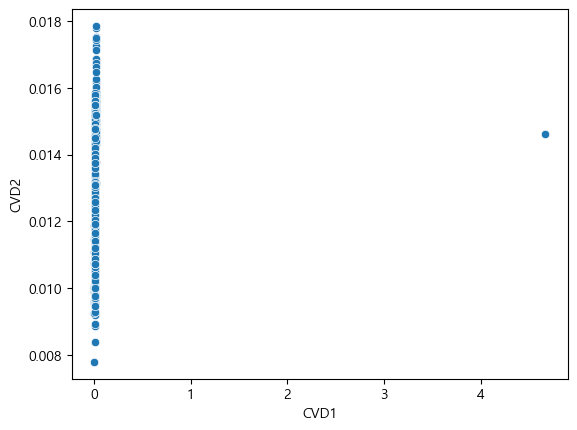

In [36]:
sns.scatterplot(data=df3, x='CVD1', y='CVD2')

<AxesSubplot:xlabel='CVD1', ylabel='CVD2'>

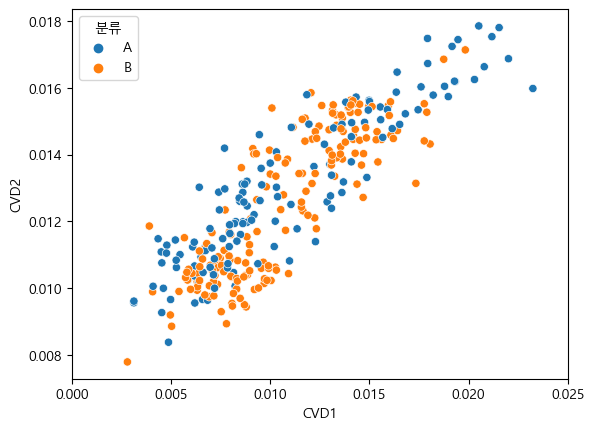

In [37]:
plt.xlim([0, 0.025])
sns.scatterplot(data=df3, x='CVD1', y='CVD2', hue='분류')

In [38]:
stats.normaltest(df3['CVD1'])

NormaltestResult(statistic=720.5243145625946, pvalue=3.468430959933392e-157)

In [39]:
stats.normaltest(df3['CVD2'])

NormaltestResult(statistic=84.23733984353808, pvalue=5.106155869659368e-19)

In [143]:
# 귀무가설 :   차이가 없다.
# 대립가설 :   차이가 있다.

cond1 = df3['분류']=='CVD1'
cond2 = df3['분류']=='CVD2'
df_error1 = df3.loc[cond1]
df_error2 = df3.loc[cond2]
stats.ranksums(df_error1['분류'], df_error2['분류'])
# P.value < 0.05 (5%) / 귀무가설 참 / 두 집단의 구매금액의 평균의 차이가 있다.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:8162: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)


RanksumsResult(statistic=nan, pvalue=nan)

10) df3에서 Target값이 높은 상위 100개 데이터를 추출하여,
#####     - '분류'에 (A,B) 따른 CVD3의 평균의 유의미한 차이가 있는지 가설검정 
#####     -  결측값은 제거 후 검정 진행 / P.value 와 결론까지 작성 
#####     - '분류'에 (A,B) 따른 CVD3값의 평균을 bar chart로 시각화 

In [41]:
df3_top=df3.sort_values(by='Target', ascending=False).head(100)

In [42]:
# 10-1) df3_top 데이터의 CVD3 값의 분포가 정규분포를 따르는가?
stats.normaltest(df3_top['CVD3'])


NormaltestResult(statistic=1015.157884834421, pvalue=3.641381470367694e-221)

In [43]:
# 10-2) '분류' A와 B 집단에 따른 CVD3의 평균의 차이가 있는가? 
# 귀무가설 : A와 B 집단에 따른 CVD3의 평균의 차이가 없다. 
# 대립가설 : A와 B 집단에 따른 CVD3의 평균의 차이가 있다. 
cond1 = (df3_top['분류']=='A')
df3_A = df3_top.loc[cond1]
df3_B = df3_top.loc[~cond1]
stats.ranksums(df3_A['CVD3'], df3_B['CVD3'])
# P.value < 0.037  / 대립가설 참 /A와 B 집단에 따른 CVD3의 평균의 차이가 있다.


RanksumsResult(statistic=2.0892453131193944, pvalue=0.0366856463687836)

In [44]:
# 10-3 ) 만약 CVD3 가 정규분포를 따르는 경우,
# 분류 'A'와 'B' 집단 간 'CVD3'값의 분산이 서로 같은지/다른지 확인 
# 귀무가설 : A'와 'B' 집단 간 'CVD3'값의 분산이 서로 같다. 
# 대립가설 :  A'와 'B' 집단 간 'CVD3'값의 분산이 서로 다르다. 
stats.bartlett(df3_A['CVD3'], df3_B['CVD3'])
# P.value > 0.05 / 귀무가설 참 / A'와 'B' 집단 간 'CVD3'값의 분산이 서로 같다.


BartlettResult(statistic=0.5324394923840704, pvalue=0.4655830481339479)

In [45]:
# 10-4) 정규성을 띄는 CVD3에 대해 분산이 서로 같은 A와 B집단의 평균의 차이? 
# 귀무가설 :  두 A , B 집단은 평균의 차이가 없다. 
# 대립가설 :  두 A , B 집단은 평균의 차이가 있다. 
stats.ttest_ind(df3_A['CVD3'], df3_B['CVD3'], equal_var=True)
# P.value < 0.05 / 대립가설 참 / 두 A , B 집단은 평균의 차이가 있다.


Ttest_indResult(statistic=2.6255866272026314, pvalue=0.0100369193134454)

<AxesSubplot:xlabel='분류', ylabel='CVD3'>

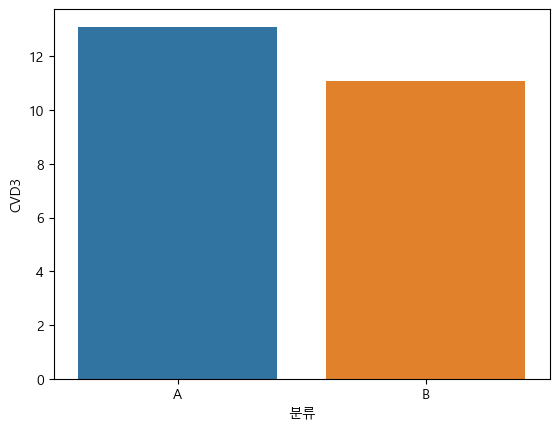

In [46]:
sns.barplot(data=df3, x='분류', y='CVD3', ci=None)

1) df3의 '분류'에 따른 'Photo1'값과 'Photo2'값의 합/최대/최소값을 계산 

In [51]:
df3.pivot_table(index='분류',values=['Photo1','Photo2'],
               aggfunc=['sum','max','min'])

sum                  max                  min              
         Photo1        Photo2 Photo1     Photo2    Photo1        Photo2
분류                                                                     
A   2020.854284   9129.070599   35.0  74.618795  0.003882  6.481900e+01
B   2931.414587  12873.318680   35.0  95.724768  0.003726  5.028307e-19

12) df3의 'DATE'항목을 날짜데이터로 변환하여, 'DATE_dt'로 선언한 뒤, 일자만 추출하여,
    - '분류'에 따른 '일자'별 'Target'값의 합을 계산

In [52]:
df3['DATE_dt']=pd.to_datetime(df3['DATE'])
df3['일자']   =df3['DATE_dt'].dt.day
df3.pivot_table(index='분류',columns='일자',values='Target',aggfunc='sum')

일자,1,2,9,10,11,12,13,14,15,16,...,22,23,24,25,26,27,28,29,30,31
분류,,,,,,,,,,,,,,,,,,,,,
A,2.5,3.2,NaN,NaN,NaN,5.2,6.6,0.9,NaN,0.3,...,NaN,1.2,1.6,3.8,4.3,9.4,7.6,3.9,4.6,3.1
B,10.1,3.7,2.0,0.9,2.0,0.8,NaN,0.5,0.2,NaN,...,5.2,6.0,3.6,7.3,8.0,3.8,7.8,5.6,2.4,3.7


# 지도학습

In [64]:
df1 = pd.read_csv('01_Data.csv')

In [149]:
# 1. 데이터 전처리 (-결측치-)
df1_clean = df1.dropna()

In [67]:
df1_clean['State'].value_counts()

계약확정     40104
해약확정       498
기간만료        33
해약진행중       12
Name: State, dtype: int64

In [73]:
# 2. 목표변수와 설명변수를 선언
Y = df1_clean['State'].replace({'계약확정':'정상','해약확정':'해약',
                            '기간만료':'정상','해약진행중':'해약'})
X = df1_clean[['Amount_Month','Term','Age','Credit_Rank']]

In [90]:
# 3. 학습데이터와 검증데이터 분할
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [104]:
# 4. 학습
from sklearn.tree import DecisionTreeClassifier

In [105]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [106]:
# 5. 평가 (정확도)
from sklearn.metrics import accuracy_score

In [107]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [108]:
accuracy_score(Y_test, Y_test_pred)

0.983959850423145

In [132]:
# 6. 새로운 데이터 입력
x1 = input('월랜탈비용을 입력 :')
x2 = input('계약 기간(월단위)을 입력하시오 :')
x3 = input('고객연령을 입력 하시오 :')
x4 = input('신용등급을 입력 하시오 :')

new_Data = pd.DataFrame([[x1,x2,x3,x4]])

월랜탈비용을 입력 :1
계약 기간(월단위)을 입력하시오 :2
고객연령을 입력 하시오 :3
신용등급을 입력 하시오 :4


In [133]:
model.predict(new_Data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['정상'], dtype=object)